# **Install and Import Libraries**

In [1]:
# If you will use XGBoost, install it first
!pip -q install xgboost

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier

# **Load the Dataset**

In [3]:
df = pd.read_csv('/content/student-por.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# **Basic Inspection**

In [4]:
print("Shape:", df.shape)

Shape: (649, 33)


In [5]:
print("\nColumns:\n", df.columns.tolist())


Columns:
 ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [6]:
print("\nData Types:\n", df.dtypes)


Data Types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [7]:
print("\nMissing Values:\n", df.isna().sum())


Missing Values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [8]:
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


In [9]:
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,649,2,GP,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,649,2,F,383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,649.0,NaN,NaN,NaN,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
address,649,2,U,452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,649,2,GT3,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,649,2,T,569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,649.0,NaN,NaN,NaN,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,NaN,NaN,NaN,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
Mjob,649,5,other,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,649,5,other,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Create Target Variable (Pass/Fail)**

In [10]:
# Pass/Fail label from final grade G3
df["pass_fail"] = (df["G3"] >= 10).astype(int)

df[["G1","G2","G3","pass_fail"]].head(10)

,G1,G2,G3,pass_fail
0,0,11,11,1
1,9,11,11,1
2,12,13,12,1
3,14,14,14,1
4,11,13,13,1
5,12,12,13,1
6,13,12,13,1
7,10,13,13,1
8,15,16,17,1
9,12,12,13,1


In [11]:
df["pass_fail"].value_counts(normalize=True)

,proportion
pass_fail,
1,0.845917
0,0.154083


# **EDA (Exploratory Data Analysis)**

## **Target Distribution**

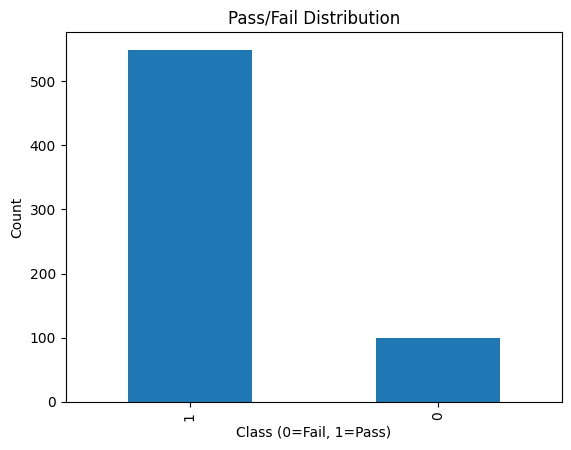

In [12]:
counts = df["pass_fail"].value_counts()
plt.figure()
counts.plot(kind="bar")
plt.title("Pass/Fail Distribution")
plt.xlabel("Class (0=Fail, 1=Pass)")
plt.ylabel("Count")
plt.show()


# **Correlation Heatmap for Numeric Features**

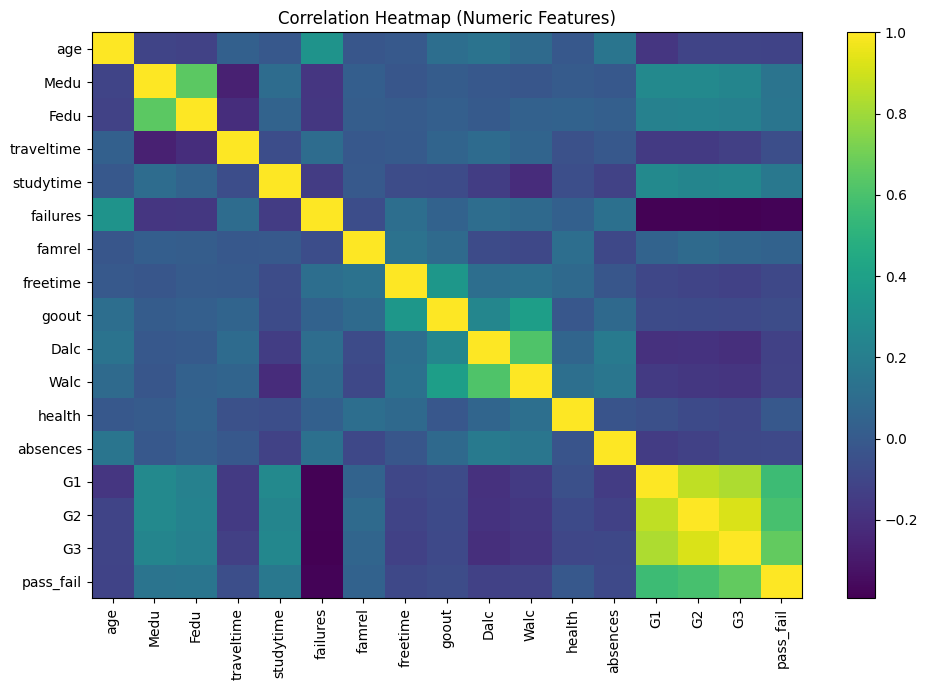

In [13]:
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns.tolist()

corr = df[numeric_cols].corr()

plt.figure(figsize=(10,7))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()


## **Relationship of G1 and G2 with Pass/Fail**

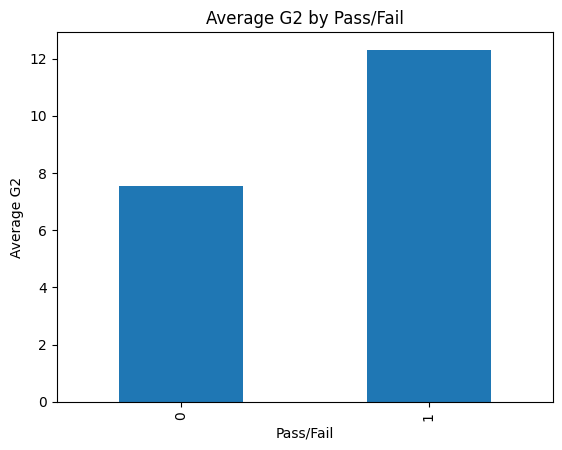

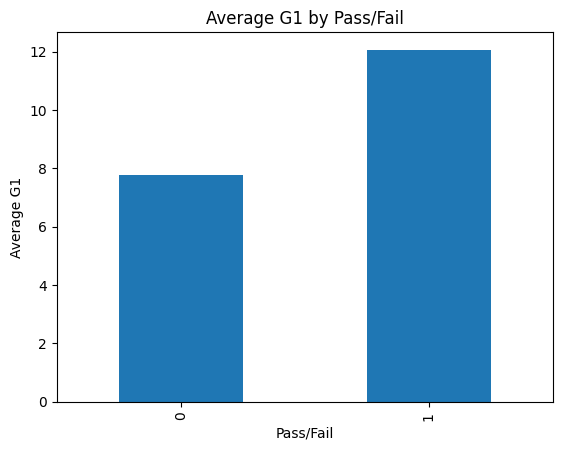

In [14]:
plt.figure()
df.groupby("pass_fail")["G2"].mean().plot(kind="bar")
plt.title("Average G2 by Pass/Fail")
plt.xlabel("Pass/Fail")
plt.ylabel("Average G2")
plt.show()

plt.figure()
df.groupby("pass_fail")["G1"].mean().plot(kind="bar")
plt.title("Average G1 by Pass/Fail")
plt.xlabel("Pass/Fail")
plt.ylabel("Average G1")
plt.show()

# **Feature Selection and Train Test Split**

In [15]:
X = df.drop(columns=["G3", "pass_fail"])   # drop final grade, keep all other features
y = df["pass_fail"]

# Identify categorical and numeric features
cat_features = X.select_dtypes(include=["object"]).columns.tolist()
num_features = X.select_dtypes(exclude=["object"]).columns.tolist()

print("Categorical features:", cat_features)
print("Numeric features:", num_features)


Categorical features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Numeric features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (519, 32) Test: (130, 32)


# **Data Preprocessing Pipeline**

In [17]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features),
    ]
)


# **Build 3+ Models**
We will train and compare:

Logistic Regression

Random Forest

Gradient Boosting

XGBoost (extra strong)

In [18]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=2000),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, random_state=42, class_weight="balanced"
    ),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        eval_metric="logloss"
    )
}


# **Train, Test, Evaluate Each Model**


Model: LogisticRegression
Accuracy: 0.9077
ROC-AUC: 0.9273

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70        20
           1       0.95      0.95      0.95       110

    accuracy                           0.91       130
   macro avg       0.82      0.82      0.82       130
weighted avg       0.91      0.91      0.91       130



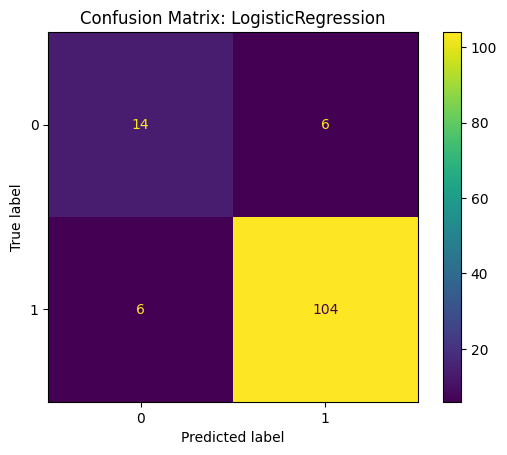


Model: RandomForest
Accuracy: 0.8846
ROC-AUC: 0.9259

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.50      0.57        20
           1       0.91      0.95      0.93       110

    accuracy                           0.88       130
   macro avg       0.79      0.73      0.75       130
weighted avg       0.88      0.88      0.88       130



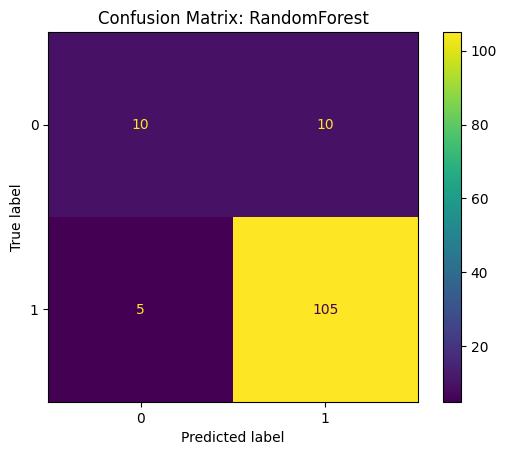


Model: GradientBoosting
Accuracy: 0.9154
ROC-AUC: 0.9605

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72        20
           1       0.95      0.95      0.95       110

    accuracy                           0.92       130
   macro avg       0.84      0.83      0.83       130
weighted avg       0.91      0.92      0.91       130



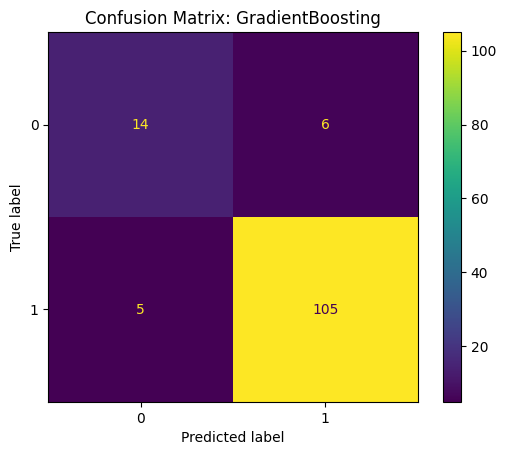


Model: XGBoost
Accuracy: 0.9077
ROC-AUC: 0.9514

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.65      0.68        20
           1       0.94      0.95      0.95       110

    accuracy                           0.91       130
   macro avg       0.83      0.80      0.82       130
weighted avg       0.90      0.91      0.91       130



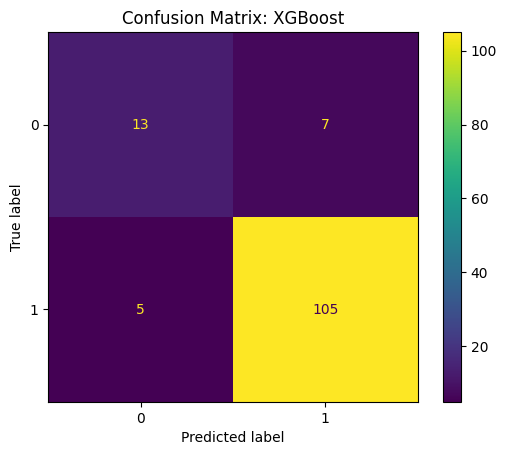

In [19]:
results = []

trained_pipelines = {}

for name, model in models.items():
    clf = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", model)
    ])

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    # ROC-AUC needs probabilities
    if hasattr(clf.named_steps["model"], "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = np.nan

    results.append({"Model": name, "Accuracy": acc, "ROC_AUC": auc})
    trained_pipelines[name] = clf

    print("\n==============================")
    print("Model:", name)
    print("Accuracy:", round(acc, 4))
    if not np.isnan(auc):
        print("ROC-AUC:", round(auc, 4))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

# **Model Comparison Table + Visualisation**

In [20]:
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
results_df

,Model,Accuracy,ROC_AUC
2,GradientBoosting,0.915385,0.960455
0,LogisticRegression,0.907692,0.927273
3,XGBoost,0.907692,0.951364
1,RandomForest,0.884615,0.925909


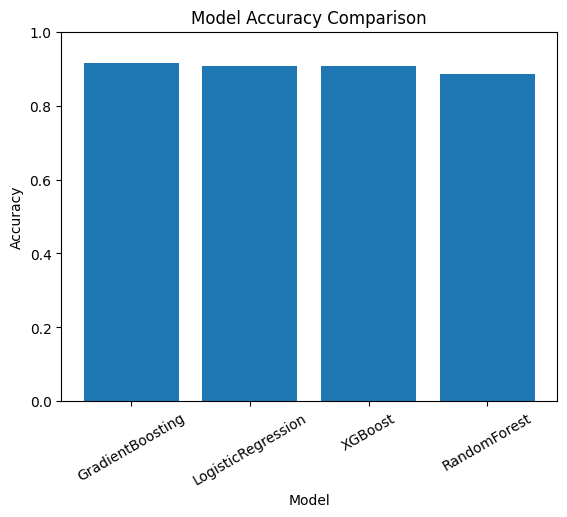

In [21]:
plt.figure()
plt.bar(results_df["Model"], results_df["Accuracy"])
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.show()

<Figure size 640x480 with 0 Axes>

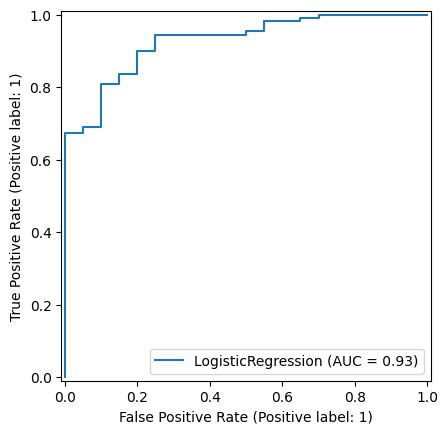

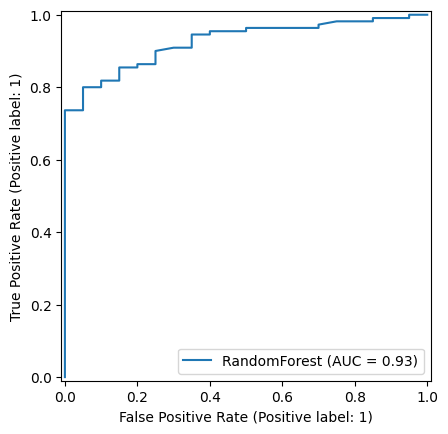

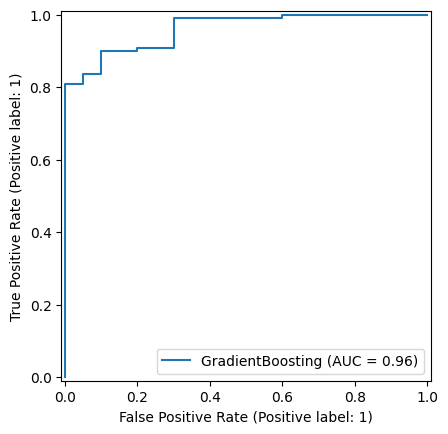

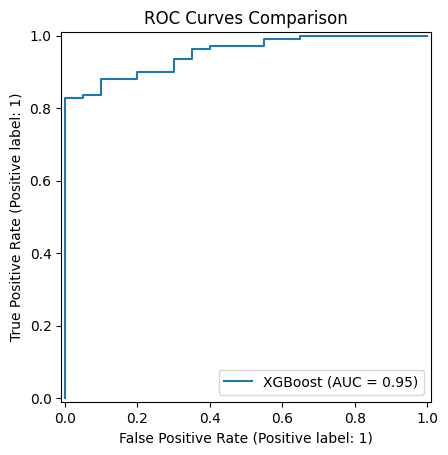

In [22]:
plt.figure()
for name, clf in trained_pipelines.items():
    if hasattr(clf.named_steps["model"], "predict_proba"):
        RocCurveDisplay.from_estimator(clf, X_test, y_test, name=name)

plt.title("ROC Curves Comparison")
plt.show()

In [23]:
best_model_name = results_df.iloc[0]["Model"]
best_model = trained_pipelines[best_model_name]

print("Best model:", best_model_name)

Best model: GradientBoosting


# **Create a sample student record**

In [24]:
sample = {
    "school": "GP",
    "sex": "F",
    "age": 17,
    "address": "U",
    "famsize": "GT3",
    "Pstatus": "T",
    "Medu": 4,
    "Fedu": 4,
    "Mjob": "teacher",
    "Fjob": "services",
    "reason": "course",
    "guardian": "mother",
    "traveltime": 1,
    "studytime": 2,
    "failures": 0,
    "schoolsup": "no",
    "famsup": "yes",
    "paid": "no",
    "activities": "yes",
    "nursery": "yes",
    "higher": "yes",
    "internet": "yes",
    "romantic": "no",
    "famrel": 4,
    "freetime": 3,
    "goout": 3,
    "Dalc": 1,
    "Walc": 2,
    "health": 4,
    "absences": 2,
    "G1": 12,
    "G2": 13
}

sample_df = pd.DataFrame([sample])

pred = best_model.predict(sample_df)[0]
pred_prob = best_model.predict_proba(sample_df)[0, 1] if hasattr(best_model.named_steps["model"], "predict_proba") else None

print("Prediction (0=Fail, 1=Pass):", pred)
if pred_prob is not None:
    print("Pass probability:", round(pred_prob, 4))


Prediction (0=Fail, 1=Pass): 1
Pass probability: 0.9991
